In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
%autosave 5

Autosaving every 5 seconds


In [ ]:
# !pip -q install opencv-python
# !pip -q install -U albumentations
# !pip -q  install opencv-python-headless==4.5.2.52
# !pip -q  install Pillow
# !pip -q  install rf_calc
# !pip -q install torch-lr-finder

In [ ]:
def module_refresh():
    import os
    if 'strixbee' in os.listdir():
        os.system("rm -rf strixbee")
        !git clone https://github.com/Code-Trees/strixbee.git
    else:
        !git clone https://github.com/Code-Trees/strixbee.git

In [ ]:
# module_refresh()

In [ ]:
try:
    #main.py
    import warnings
    warnings.filterwarnings('ignore')

    import numpy as np
    import torch
    import torch.nn.functional as F
    import torch.nn as nn

    from torch.optim import SGD
    from torch.utils.data import DataLoader
    from torch.utils.data.dataset import Dataset
    from torch.optim.lr_scheduler import StepLR

    from torchvision import transforms,datasets

    import numpy as np
    import matplotlib.pyplot as plt
    from torchsummary import summary
    import random
    import seaborn as sns
    import gc

    import albumentations as A
    from albumentations.augmentations.geometric.resize import Resize
    from albumentations.pytorch.transforms import ToTensorV2

    from rf_calc import receptive_field
    import seaborn as sns
    import matplotlib.pyplot as plt
except:
    !pip -q install opencv-python
    !pip -q install -U albumentations
    !pip -q  install opencv-python-headless==4.5.2.52
    !pip -q  install Pillow
    !pip -q  install rf_calc
    !pip -q install torch-lr-finder

    import warnings
    warnings.filterwarnings('ignore')

    import numpy as np
    import torch
    import torch.nn.functional as F
    import torch.nn as nn

    from torch.optim import SGD
    from torch.utils.data import DataLoader
    from torch.utils.data.dataset import Dataset
    from torch.optim.lr_scheduler import StepLR

    from torchvision import transforms,datasets

    import numpy as np
    import matplotlib.pyplot as plt
    from torchsummary import summary
    import random
    import seaborn as sns
    import gc

    import albumentations as A
    from albumentations.augmentations.geometric.resize import Resize
    from albumentations.pytorch.transforms import ToTensorV2

    from rf_calc import receptive_field
    import seaborn as sns
    import matplotlib.pyplot as plt

In [ ]:
from strixbee.utils.data_iter import get_data,get_data_stats
from strixbee.utils.data_transforms import AlbumDataset
from strixbee.utils.optimizer_utils import *
from strixbee.utils.train_test import *
from strixbee.utils.gpu import clean_gpu
from strixbee.utils.plots import * 
from strixbee.utils import *
from strixbee.model.cifar10_model import Cifar10Net1

Files already downloaded and verified
Files already downloaded and verified


<Figure size 1080x360 with 0 Axes>

Files already downloaded and verified
Files already downloaded and verified
Train Shape: (50000, 32, 32, 3) Test Shape: (10000, 32, 32, 3) 



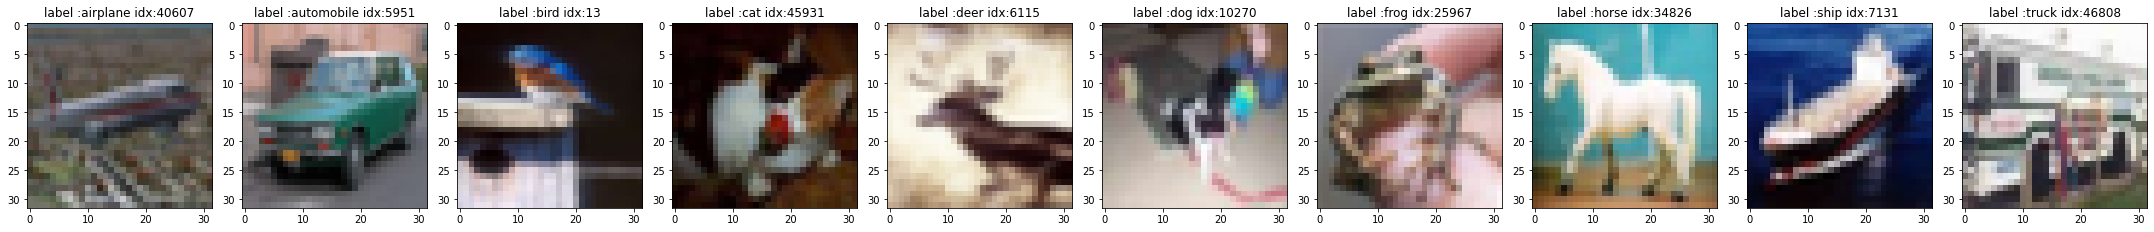

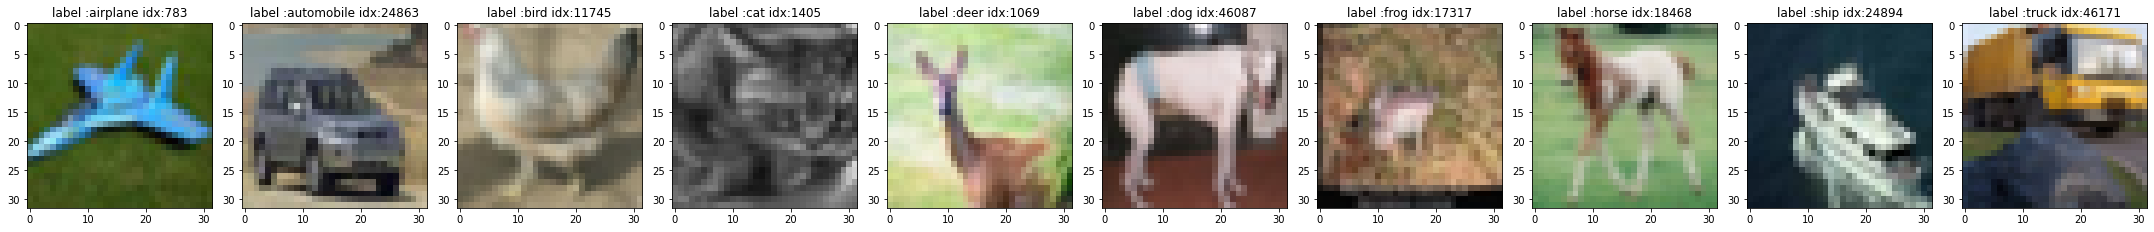

In [ ]:
labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
train,test = get_data()
print(f"Train Shape: {train.data.shape} Test Shape: {test.data.shape} \n")
plot_unique_images(train,labels =labels)
plot_unique_images(train,labels =labels)

In [ ]:
mean,std  = get_data_stats(train,test,img_norm_typ ='train+test',plot = False)

<Figure size 720x360 with 0 Axes>

0.49186877885008395, 0.48265390516493006, 0.44717727749693653)(0.2469712143255279, 0.24338893940434994, 0.2615925905215076

In [ ]:
# #ReduceLROnPlatue

# #Advanced Normalization
# train_transform =A.Compose([A.Resize(32,32),
#                             A.Normalize(mean = mean,std = std,max_pixel_value=255,always_apply = True),
#                                 A.ShiftScaleRotate(always_apply=False),
#                                 A.CoarseDropout(always_apply = False,max_holes = 1, max_height=16, max_width=16, min_holes = 1, min_height=16, min_width=16, fill_value=mean, mask_fill_value = None),
#                             ToTensorV2(transpose_mask =False),
#                                 ])      
# test_transform = A.Compose([A.Resize(32,32),
#                                 A.Normalize(mean = mean,std = std,max_pixel_value=255,always_apply = True),
#                             ToTensorV2(transpose_mask =False), ])
                            
# train_alb = AlbumDataset(train,train_transform)
# test_alb = AlbumDataset(test,test_transform)

# batch_size = 64
# args = {'pin_memory':True,'num_workers':4} if torch.cuda.is_available() else {}
# train_loader = DataLoader(train_alb,batch_size=batch_size,shuffle = True,**args)
# test_loader = DataLoader(test_alb,batch_size=batch_size,**args)

In [ ]:
# demo_model = Cifar10Net1(dropout_val=0.00,norm_type='bn')
# lr = run_lrfinder(demo_model,train_loader,test_loader,loops = 2)

In [ ]:
# lr
# 0.016496480740980205
# 0.0818546730706902

In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [ ]:
def Run_Model(model_class,train_loader,test_loader,epochs , L1 = False):
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print (f'running on {device} \n')
    #take input as normal_type ['gbn','bn','gn','ln']
    model = model_class.to(device)
    try:
        # print(summary(model,input_size = (3,32,32)))
        pass
    except:
        pass

    optimizer,scheduler = get_optimizer(model,lr =0.01,scheduler = True,scheduler_type = 'steplr')
    # optimizer,scheduler = get_optimizer(model,scheduler = True )
    # optimizer = SGD( params = model.parameters(),lr = 0.01,momentum = 0.9)
    # scheduler = StepLR(optimizer,step_size = 20,gamma = 0.1)

    train_losses = []
    train_accuracy = []
    test_losses =[]
    test_accuracy = []

    for EPOCHS in range(0,epochs):
        if L1 == True:
            train_loss, train_acc = trainning(model,device,train_loader,optimizer,EPOCHS,L1 = L1)
            train_losses.append(train_loss)
            train_accuracy.append(train_acc)
        else:
            train_loss, train_acc = trainning(model,device,train_loader,optimizer,EPOCHS)
            train_losses.append(train_loss)
            train_accuracy.append(train_acc)

        test_loss,test_acc = testing(model,device,test_loader,optimizer,EPOCHS)

        test_accuracy.append(test_acc)
        test_losses.append(test_loss)
        
        scheduler.step()
        try:
            if (EPOCHS >=3)&(max(test_accuracy[:-1]) < test_accuracy[-1]) & (max(test_accuracy) >= .78):
                checkpoint = {'epoch': EPOCHS + 1,'valid_loss_min': test_losses[-1],'state_dict': model.state_dict(),'optimizer': optimizer.state_dict(),} # Export to TorchScript
                torch.save(checkpoint ,'./Model_cifar10.pt') # Save
                print (f" Target Achieved: {max(test_accuracy)*100}% Test Accuracy !!")
        except:
            print('Model Saving Failed !!')

        print ("LR :{}\n".format(scheduler.get_lr()[0]))
    return model,train_losses, train_accuracy,test_losses,test_accuracy


In [ ]:
# train_transform =A.Compose([A.Resize(32,32),
#                             A.Normalize(mean = mean,std = std,max_pixel_value=255,always_apply = True),
#                              A.ShiftScaleRotate(always_apply=False),
#                              A.CoarseDropout(always_apply = False,max_holes = 1, max_height=16, max_width=16, min_holes = 1, min_height=16, min_width=16, fill_value=mean, mask_fill_value = None),
#                             ToTensorV2(transpose_mask =False),
#                              ])      
# test_transform = A.Compose([A.Resize(32,32),
#                              A.Normalize(mean = mean,std = std,max_pixel_value=255,always_apply = True),
#                            ToTensorV2(transpose_mask =False), ])

Files already downloaded and verified
Files already downloaded and verified
running on cuda 



Train ==> Epochs: 0 Batch:  781 loss: 1.614363193511963 Accuracy: 35.27% : 100%|██████████| 782/782 [00:11<00:00, 65.70it/s]
Test ==> Epochs: 0 Batch:  781 loss: 0.022753037815093993 Accuracy: 47.14% : 100%|██████████| 782/782 [00:06<00:00, 125.16it/s]


Model Saving Failed !!
LR :0.01



Train ==> Epochs: 1 Batch:  781 loss: 1.6030168533325195 Accuracy: 47.12% : 100%|██████████| 782/782 [00:12<00:00, 64.17it/s]
Test ==> Epochs: 1 Batch:  781 loss: 0.02008678116440773 Accuracy: 54.15% : 100%|██████████| 782/782 [00:06<00:00, 125.19it/s]


LR :0.01



Train ==> Epochs: 2 Batch:  781 loss: 1.0980006456375122 Accuracy: 51.67% : 100%|██████████| 782/782 [00:11<00:00, 66.46it/s]
Test ==> Epochs: 2 Batch:  781 loss: 0.016950812324285507 Accuracy: 61.16% : 100%|██████████| 782/782 [00:06<00:00, 123.30it/s]


LR :0.01



Train ==> Epochs: 3 Batch:  781 loss: 1.0565241575241089 Accuracy: 55.52% : 100%|██████████| 782/782 [00:11<00:00, 66.64it/s]
Test ==> Epochs: 3 Batch:  781 loss: 0.017264118053913115 Accuracy: 60.98% : 100%|██████████| 782/782 [00:06<00:00, 121.58it/s]


LR :0.01



Train ==> Epochs: 4 Batch:  781 loss: 1.5901532173156738 Accuracy: 57.97% : 100%|██████████| 782/782 [00:12<00:00, 64.44it/s]
Test ==> Epochs: 4 Batch:  781 loss: 0.01459658211708069 Accuracy: 67.46% : 100%|██████████| 782/782 [00:06<00:00, 123.16it/s]


LR :0.01



Train ==> Epochs: 5 Batch:  781 loss: 1.2139967679977417 Accuracy: 59.58% : 100%|██████████| 782/782 [00:11<00:00, 65.39it/s]
Test ==> Epochs: 5 Batch:  781 loss: 0.013015205726623536 Accuracy: 70.55% : 100%|██████████| 782/782 [00:06<00:00, 125.48it/s]


LR :0.01



Train ==> Epochs: 6 Batch:  781 loss: 1.0405259132385254 Accuracy: 61.08% : 100%|██████████| 782/782 [00:11<00:00, 66.89it/s]
Test ==> Epochs: 6 Batch:  781 loss: 0.014054667345285416 Accuracy: 68.68% : 100%|██████████| 782/782 [00:06<00:00, 125.74it/s]


LR :0.01



Train ==> Epochs: 7 Batch:  781 loss: 0.7212304472923279 Accuracy: 62.29% : 100%|██████████| 782/782 [00:11<00:00, 65.38it/s]
Test ==> Epochs: 7 Batch:  781 loss: 0.012762027661204338 Accuracy: 71.64% : 100%|██████████| 782/782 [00:06<00:00, 122.70it/s]


LR :0.01



Train ==> Epochs: 8 Batch:  781 loss: 0.6392428874969482 Accuracy: 63.63% : 100%|██████████| 782/782 [00:11<00:00, 66.74it/s]
Test ==> Epochs: 8 Batch:  781 loss: 0.01319294136583805 Accuracy: 70.03% : 100%|██████████| 782/782 [00:06<00:00, 125.40it/s]


LR :0.01



Train ==> Epochs: 9 Batch:  781 loss: 0.8683590888977051 Accuracy: 64.61% : 100%|██████████| 782/782 [00:11<00:00, 65.48it/s]
Test ==> Epochs: 9 Batch:  781 loss: 0.01137888928771019 Accuracy: 74.83% : 100%|██████████| 782/782 [00:06<00:00, 121.68it/s]


LR :0.01



Train ==> Epochs: 10 Batch:  781 loss: 0.6009251475334167 Accuracy: 65.37% : 100%|██████████| 782/782 [00:12<00:00, 65.09it/s]
Test ==> Epochs: 10 Batch:  781 loss: 0.01258477004647255 Accuracy: 71.75% : 100%|██████████| 782/782 [00:06<00:00, 121.38it/s]


LR :0.01



Train ==> Epochs: 11 Batch:  781 loss: 0.9765670299530029 Accuracy: 66.46% : 100%|██████████| 782/782 [00:11<00:00, 65.79it/s]
Test ==> Epochs: 11 Batch:  781 loss: 0.010801763924956322 Accuracy: 75.90% : 100%|██████████| 782/782 [00:06<00:00, 121.81it/s]


LR :0.01



Train ==> Epochs: 12 Batch:  781 loss: 1.5523402690887451 Accuracy: 67.02% : 100%|██████████| 782/782 [00:11<00:00, 66.28it/s]
Test ==> Epochs: 12 Batch:  781 loss: 0.010937930653691292 Accuracy: 75.69% : 100%|██████████| 782/782 [00:06<00:00, 123.91it/s]


LR :0.01



Train ==> Epochs: 13 Batch:  781 loss: 1.0410300493240356 Accuracy: 67.31% : 100%|██████████| 782/782 [00:11<00:00, 65.50it/s]
Test ==> Epochs: 13 Batch:  781 loss: 0.010768365806937217 Accuracy: 75.77% : 100%|██████████| 782/782 [00:06<00:00, 123.24it/s]


LR :0.01



Train ==> Epochs: 14 Batch:  781 loss: 0.8273208141326904 Accuracy: 68.09% : 100%|██████████| 782/782 [00:11<00:00, 66.88it/s]
Test ==> Epochs: 14 Batch:  781 loss: 0.00932826154768467 Accuracy: 79.20% : 100%|██████████| 782/782 [00:06<00:00, 124.35it/s]


 Target Achieved: 79.19800000000001% Test Accuracy !!
LR :0.01



Train ==> Epochs: 15 Batch:  781 loss: 1.4173380136489868 Accuracy: 68.34% : 100%|██████████| 782/782 [00:11<00:00, 66.29it/s]
Test ==> Epochs: 15 Batch:  781 loss: 0.00919998508065939 Accuracy: 79.53% : 100%|██████████| 782/782 [00:06<00:00, 126.26it/s]


 Target Achieved: 79.534% Test Accuracy !!
LR :0.01



Train ==> Epochs: 16 Batch:  781 loss: 1.1958028078079224 Accuracy: 68.47% : 100%|██████████| 782/782 [00:11<00:00, 66.89it/s]
Test ==> Epochs: 16 Batch:  781 loss: 0.009077450852394104 Accuracy: 79.86% : 100%|██████████| 782/782 [00:06<00:00, 122.05it/s]


 Target Achieved: 79.85600000000001% Test Accuracy !!
LR :0.01



Train ==> Epochs: 17 Batch:  781 loss: 1.114548921585083 Accuracy: 69.47% : 100%|██████████| 782/782 [00:11<00:00, 66.35it/s]
Test ==> Epochs: 17 Batch:  781 loss: 0.009463457391858101 Accuracy: 78.96% : 100%|██████████| 782/782 [00:06<00:00, 123.37it/s]


LR :0.01



Train ==> Epochs: 18 Batch:  781 loss: 0.7766478657722473 Accuracy: 69.72% : 100%|██████████| 782/782 [00:11<00:00, 65.87it/s]
Test ==> Epochs: 18 Batch:  781 loss: 0.00902936658859253 Accuracy: 79.85% : 100%|██████████| 782/782 [00:06<00:00, 123.48it/s]


LR :0.01



Train ==> Epochs: 19 Batch:  781 loss: 1.280038595199585 Accuracy: 70.19% : 100%|██████████| 782/782 [00:11<00:00, 65.58it/s]
Test ==> Epochs: 19 Batch:  781 loss: 0.009481220789551735 Accuracy: 78.76% : 100%|██████████| 782/782 [00:06<00:00, 124.47it/s]


LR :0.0001



Train ==> Epochs: 20 Batch:  781 loss: 0.8902420997619629 Accuracy: 72.67% : 100%|██████████| 782/782 [00:11<00:00, 66.31it/s]
Test ==> Epochs: 20 Batch:  781 loss: 0.0072334690526127815 Accuracy: 84.17% : 100%|██████████| 782/782 [00:06<00:00, 123.23it/s]


 Target Achieved: 84.166% Test Accuracy !!
LR :0.001



Train ==> Epochs: 21 Batch:  781 loss: 0.9984609484672546 Accuracy: 73.37% : 100%|██████████| 782/782 [00:12<00:00, 65.02it/s]
Test ==> Epochs: 21 Batch:  781 loss: 0.007190547470450401 Accuracy: 84.18% : 100%|██████████| 782/782 [00:06<00:00, 122.19it/s]


 Target Achieved: 84.184% Test Accuracy !!
LR :0.001



Train ==> Epochs: 22 Batch:  781 loss: 0.7682217359542847 Accuracy: 73.77% : 100%|██████████| 782/782 [00:12<00:00, 65.16it/s]
Test ==> Epochs: 22 Batch:  781 loss: 0.007021549333333969 Accuracy: 84.72% : 100%|██████████| 782/782 [00:06<00:00, 120.81it/s]


 Target Achieved: 84.72% Test Accuracy !!
LR :0.001



Train ==> Epochs: 23 Batch:  781 loss: 0.7743814587593079 Accuracy: 73.75% : 100%|██████████| 782/782 [00:11<00:00, 65.45it/s]
Test ==> Epochs: 23 Batch:  781 loss: 0.0068962199801206586 Accuracy: 84.94% : 100%|██████████| 782/782 [00:06<00:00, 121.14it/s]


 Target Achieved: 84.942% Test Accuracy !!
LR :0.001



Train ==> Epochs: 24 Batch:  781 loss: 0.857744574546814 Accuracy: 73.69% : 100%|██████████| 782/782 [00:11<00:00, 65.42it/s]
Test ==> Epochs: 24 Batch:  781 loss: 0.006857878055870533 Accuracy: 84.95% : 100%|██████████| 782/782 [00:06<00:00, 123.86it/s]


 Target Achieved: 84.954% Test Accuracy !!
LR :0.001



Train ==> Epochs: 25 Batch:  781 loss: 0.7563661932945251 Accuracy: 74.17% : 100%|██████████| 782/782 [00:11<00:00, 65.99it/s]
Test ==> Epochs: 25 Batch:  781 loss: 0.006760043902099133 Accuracy: 85.12% : 100%|██████████| 782/782 [00:06<00:00, 122.71it/s]


 Target Achieved: 85.124% Test Accuracy !!
LR :0.001



Train ==> Epochs: 26 Batch:  781 loss: 0.9444796442985535 Accuracy: 74.22% : 100%|██████████| 782/782 [00:11<00:00, 66.22it/s]
Test ==> Epochs: 26 Batch:  781 loss: 0.0067392664214968685 Accuracy: 85.27% : 100%|██████████| 782/782 [00:06<00:00, 123.10it/s]


 Target Achieved: 85.268% Test Accuracy !!
LR :0.001



Train ==> Epochs: 27 Batch:  781 loss: 1.1944174766540527 Accuracy: 73.98% : 100%|██████████| 782/782 [00:11<00:00, 65.63it/s]
Test ==> Epochs: 27 Batch:  781 loss: 0.006692065424323082 Accuracy: 85.32% : 100%|██████████| 782/782 [00:06<00:00, 122.58it/s]


 Target Achieved: 85.316% Test Accuracy !!
LR :0.001



Train ==> Epochs: 28 Batch:  781 loss: 0.47156524658203125 Accuracy: 74.33% : 100%|██████████| 782/782 [00:12<00:00, 64.85it/s]
Test ==> Epochs: 28 Batch:  781 loss: 0.00661544812887907 Accuracy: 85.56% : 100%|██████████| 782/782 [00:06<00:00, 123.24it/s]


 Target Achieved: 85.56% Test Accuracy !!
LR :0.001



Train ==> Epochs: 29 Batch:  781 loss: 0.39980199933052063 Accuracy: 74.32% : 100%|██████████| 782/782 [00:11<00:00, 65.56it/s]
Test ==> Epochs: 29 Batch:  781 loss: 0.006559607684910297 Accuracy: 85.58% : 100%|██████████| 782/782 [00:06<00:00, 122.80it/s]


 Target Achieved: 85.58200000000001% Test Accuracy !!
LR :0.001



Train ==> Epochs: 30 Batch:  781 loss: 0.7365477085113525 Accuracy: 74.57% : 100%|██████████| 782/782 [00:12<00:00, 64.46it/s]
Test ==> Epochs: 30 Batch:  781 loss: 0.006491572204828262 Accuracy: 85.87% : 100%|██████████| 782/782 [00:06<00:00, 121.23it/s]


 Target Achieved: 85.87% Test Accuracy !!
LR :0.001



Train ==> Epochs: 31 Batch:  781 loss: 0.8876914978027344 Accuracy: 74.38% : 100%|██████████| 782/782 [00:11<00:00, 65.83it/s]
Test ==> Epochs: 31 Batch:  781 loss: 0.006479187444895506 Accuracy: 85.74% : 100%|██████████| 782/782 [00:06<00:00, 123.56it/s]


LR :0.001



Train ==> Epochs: 32 Batch:  781 loss: 0.5496484041213989 Accuracy: 74.57% : 100%|██████████| 782/782 [00:12<00:00, 65.01it/s]
Test ==> Epochs: 32 Batch:  781 loss: 0.006365490382909775 Accuracy: 85.97% : 100%|██████████| 782/782 [00:06<00:00, 121.80it/s]


 Target Achieved: 85.97399999999999% Test Accuracy !!
LR :0.001



Train ==> Epochs: 33 Batch:  781 loss: 0.6060070395469666 Accuracy: 74.78% : 100%|██████████| 782/782 [00:11<00:00, 65.52it/s]
Test ==> Epochs: 33 Batch:  781 loss: 0.006376917727589608 Accuracy: 86.05% : 100%|██████████| 782/782 [00:06<00:00, 120.93it/s]


 Target Achieved: 86.054% Test Accuracy !!
LR :0.001



Train ==> Epochs: 34 Batch:  781 loss: 0.2957701086997986 Accuracy: 74.79% : 100%|██████████| 782/782 [00:11<00:00, 65.28it/s]
Test ==> Epochs: 34 Batch:  781 loss: 0.0063179783475399015 Accuracy: 86.25% : 100%|██████████| 782/782 [00:06<00:00, 123.28it/s]


 Target Achieved: 86.25399999999999% Test Accuracy !!
LR :0.001



Train ==> Epochs: 35 Batch:  781 loss: 0.4100886881351471 Accuracy: 74.97% : 100%|██████████| 782/782 [00:11<00:00, 65.44it/s]
Test ==> Epochs: 35 Batch:  781 loss: 0.006358210927248001 Accuracy: 86.02% : 100%|██████████| 782/782 [00:06<00:00, 121.23it/s]


LR :0.001



Train ==> Epochs: 36 Batch:  781 loss: 0.3930988311767578 Accuracy: 75.13% : 100%|██████████| 782/782 [00:12<00:00, 64.98it/s]
Test ==> Epochs: 36 Batch:  781 loss: 0.0062552480459213255 Accuracy: 86.42% : 100%|██████████| 782/782 [00:06<00:00, 121.98it/s]


 Target Achieved: 86.416% Test Accuracy !!
LR :0.001



Train ==> Epochs: 37 Batch:  781 loss: 1.4009865522384644 Accuracy: 74.99% : 100%|██████████| 782/782 [00:11<00:00, 65.53it/s]
Test ==> Epochs: 37 Batch:  781 loss: 0.006245193404257297 Accuracy: 86.37% : 100%|██████████| 782/782 [00:06<00:00, 122.98it/s]


LR :0.001



Train ==> Epochs: 38 Batch:  781 loss: 0.4511778950691223 Accuracy: 74.99% : 100%|██████████| 782/782 [00:12<00:00, 65.05it/s]
Test ==> Epochs: 38 Batch:  781 loss: 0.006191223467290402 Accuracy: 86.40% : 100%|██████████| 782/782 [00:06<00:00, 120.19it/s]


LR :0.001



Train ==> Epochs: 39 Batch:  781 loss: 0.5155469179153442 Accuracy: 74.96% : 100%|██████████| 782/782 [00:11<00:00, 65.47it/s]
Test ==> Epochs: 39 Batch:  781 loss: 0.006217445520460605 Accuracy: 86.30% : 100%|██████████| 782/782 [00:06<00:00, 119.16it/s]


LR :1e-05



Train ==> Epochs: 40 Batch:  781 loss: 0.9440948367118835 Accuracy: 75.32% : 100%|██████████| 782/782 [00:11<00:00, 65.39it/s]
Test ==> Epochs: 40 Batch:  781 loss: 0.006073308712542057 Accuracy: 86.71% : 100%|██████████| 782/782 [00:06<00:00, 120.08it/s]


 Target Achieved: 86.712% Test Accuracy !!
LR :0.0001



Train ==> Epochs: 41 Batch:  781 loss: 0.8044737577438354 Accuracy: 75.37% : 100%|██████████| 782/782 [00:11<00:00, 65.94it/s]
Test ==> Epochs: 41 Batch:  781 loss: 0.006062096176147461 Accuracy: 86.67% : 100%|██████████| 782/782 [00:06<00:00, 121.46it/s]


LR :0.0001



Train ==> Epochs: 42 Batch:  781 loss: 0.30805787444114685 Accuracy: 75.50% : 100%|██████████| 782/782 [00:11<00:00, 65.95it/s]
Test ==> Epochs: 42 Batch:  781 loss: 0.006072787780165672 Accuracy: 86.71% : 100%|██████████| 782/782 [00:06<00:00, 120.78it/s]


LR :0.0001



Train ==> Epochs: 43 Batch:  781 loss: 1.045821189880371 Accuracy: 75.44% : 100%|██████████| 782/782 [00:12<00:00, 65.02it/s]
Test ==> Epochs: 43 Batch:  781 loss: 0.006021449007689953 Accuracy: 86.80% : 100%|██████████| 782/782 [00:06<00:00, 120.77it/s]


 Target Achieved: 86.79599999999999% Test Accuracy !!
LR :0.0001



Train ==> Epochs: 44 Batch:  781 loss: 0.7466952204704285 Accuracy: 75.48% : 100%|██████████| 782/782 [00:11<00:00, 65.42it/s]
Test ==> Epochs: 44 Batch:  781 loss: 0.006003966926336288 Accuracy: 86.84% : 100%|██████████| 782/782 [00:06<00:00, 119.79it/s]


 Target Achieved: 86.83800000000001% Test Accuracy !!
LR :0.0001



Train ==> Epochs: 45 Batch:  781 loss: 0.4936608076095581 Accuracy: 75.51% : 100%|██████████| 782/782 [00:12<00:00, 64.87it/s]
Test ==> Epochs: 45 Batch:  781 loss: 0.005977617429345846 Accuracy: 86.91% : 100%|██████████| 782/782 [00:06<00:00, 120.15it/s]


 Target Achieved: 86.908% Test Accuracy !!
LR :0.0001



Train ==> Epochs: 46 Batch:  781 loss: 1.3081483840942383 Accuracy: 75.61% : 100%|██████████| 782/782 [00:11<00:00, 65.53it/s]
Test ==> Epochs: 46 Batch:  781 loss: 0.006036665637344122 Accuracy: 86.88% : 100%|██████████| 782/782 [00:06<00:00, 118.77it/s]


LR :0.0001



Train ==> Epochs: 47 Batch:  781 loss: 0.41336899995803833 Accuracy: 75.80% : 100%|██████████| 782/782 [00:12<00:00, 64.33it/s]
Test ==> Epochs: 47 Batch:  781 loss: 0.0060081572458148 Accuracy: 86.85% : 100%|██████████| 782/782 [00:06<00:00, 119.58it/s]


LR :0.0001



Train ==> Epochs: 48 Batch:  781 loss: 0.5033641457557678 Accuracy: 75.50% : 100%|██████████| 782/782 [00:11<00:00, 65.22it/s]
Test ==> Epochs: 48 Batch:  781 loss: 0.005947076123952865 Accuracy: 87.02% : 100%|██████████| 782/782 [00:06<00:00, 119.27it/s]


 Target Achieved: 87.024% Test Accuracy !!
LR :0.0001



Train ==> Epochs: 49 Batch:  781 loss: 1.160301923751831 Accuracy: 75.78% : 100%|██████████| 782/782 [00:11<00:00, 65.34it/s]
Test ==> Epochs: 49 Batch:  781 loss: 0.005983047877401114 Accuracy: 86.96% : 100%|██████████| 782/782 [00:06<00:00, 115.74it/s]


LR :0.0001



Train ==> Epochs: 50 Batch:  781 loss: 1.118735432624817 Accuracy: 75.60% : 100%|██████████| 782/782 [00:12<00:00, 64.63it/s]
Test ==> Epochs: 50 Batch:  781 loss: 0.0059847705568373205 Accuracy: 87.01% : 100%|██████████| 782/782 [00:06<00:00, 120.35it/s]


LR :0.0001



Train ==> Epochs: 51 Batch:  781 loss: 0.8146887421607971 Accuracy: 75.81% : 100%|██████████| 782/782 [00:12<00:00, 64.05it/s]
Test ==> Epochs: 51 Batch:  781 loss: 0.005942460190951824 Accuracy: 87.06% : 100%|██████████| 782/782 [00:06<00:00, 119.14it/s]


 Target Achieved: 87.058% Test Accuracy !!
LR :0.0001



Train ==> Epochs: 52 Batch:  781 loss: 0.5491805672645569 Accuracy: 75.58% : 100%|██████████| 782/782 [00:12<00:00, 64.94it/s]
Test ==> Epochs: 52 Batch:  781 loss: 0.0059797251518070695 Accuracy: 86.91% : 100%|██████████| 782/782 [00:06<00:00, 121.10it/s]


LR :0.0001



Train ==> Epochs: 53 Batch:  781 loss: 0.8105252385139465 Accuracy: 75.95% : 100%|██████████| 782/782 [00:11<00:00, 65.62it/s]
Test ==> Epochs: 53 Batch:  781 loss: 0.0059491441562771795 Accuracy: 86.96% : 100%|██████████| 782/782 [00:06<00:00, 123.05it/s]


LR :0.0001



Train ==> Epochs: 54 Batch:  781 loss: 1.059300184249878 Accuracy: 75.58% : 100%|██████████| 782/782 [00:11<00:00, 65.38it/s]
Test ==> Epochs: 54 Batch:  781 loss: 0.00596106662362814 Accuracy: 86.92% : 100%|██████████| 782/782 [00:06<00:00, 120.11it/s]


LR :0.0001



Train ==> Epochs: 55 Batch:  781 loss: 0.8954349756240845 Accuracy: 75.94% : 100%|██████████| 782/782 [00:11<00:00, 65.98it/s]
Test ==> Epochs: 55 Batch:  781 loss: 0.005917549819350242 Accuracy: 87.13% : 100%|██████████| 782/782 [00:06<00:00, 119.87it/s]


 Target Achieved: 87.128% Test Accuracy !!
LR :0.0001



Train ==> Epochs: 56 Batch:  781 loss: 0.7597824335098267 Accuracy: 75.70% : 100%|██████████| 782/782 [00:11<00:00, 65.78it/s]
Test ==> Epochs: 56 Batch:  781 loss: 0.00596633056819439 Accuracy: 86.89% : 100%|██████████| 782/782 [00:06<00:00, 121.00it/s]


LR :0.0001



Train ==> Epochs: 57 Batch:  781 loss: 0.8969327807426453 Accuracy: 75.65% : 100%|██████████| 782/782 [00:11<00:00, 65.33it/s]
Test ==> Epochs: 57 Batch:  781 loss: 0.005944231112003326 Accuracy: 86.98% : 100%|██████████| 782/782 [00:06<00:00, 119.95it/s]


LR :0.0001



Train ==> Epochs: 58 Batch:  781 loss: 0.6331477165222168 Accuracy: 76.02% : 100%|██████████| 782/782 [00:12<00:00, 65.04it/s]
Test ==> Epochs: 58 Batch:  781 loss: 0.0059232374335825445 Accuracy: 87.10% : 100%|██████████| 782/782 [00:06<00:00, 119.31it/s]


LR :0.0001



Train ==> Epochs: 59 Batch:  781 loss: 0.523855447769165 Accuracy: 75.61% : 100%|██████████| 782/782 [00:12<00:00, 64.79it/s]
Test ==> Epochs: 59 Batch:  781 loss: 0.005928197713941335 Accuracy: 87.05% : 100%|██████████| 782/782 [00:06<00:00, 119.08it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 60 Batch:  781 loss: 0.5686931610107422 Accuracy: 75.64% : 100%|██████████| 782/782 [00:12<00:00, 64.55it/s]
Test ==> Epochs: 60 Batch:  781 loss: 0.005911548537313938 Accuracy: 87.05% : 100%|██████████| 782/782 [00:06<00:00, 119.17it/s]


LR :1e-05



Train ==> Epochs: 61 Batch:  781 loss: 0.7534257173538208 Accuracy: 75.67% : 100%|██████████| 782/782 [00:11<00:00, 65.29it/s]
Test ==> Epochs: 61 Batch:  781 loss: 0.005894347031861544 Accuracy: 87.08% : 100%|██████████| 782/782 [00:06<00:00, 117.64it/s]


LR :1e-05



Train ==> Epochs: 62 Batch:  781 loss: 0.3714528977870941 Accuracy: 75.88% : 100%|██████████| 782/782 [00:12<00:00, 64.78it/s]
Test ==> Epochs: 62 Batch:  781 loss: 0.005905621487647295 Accuracy: 87.11% : 100%|██████████| 782/782 [00:06<00:00, 119.22it/s]


LR :1e-05



Train ==> Epochs: 63 Batch:  781 loss: 0.330064058303833 Accuracy: 75.92% : 100%|██████████| 782/782 [00:11<00:00, 65.19it/s]
Test ==> Epochs: 63 Batch:  781 loss: 0.00591236522257328 Accuracy: 87.15% : 100%|██████████| 782/782 [00:06<00:00, 118.83it/s]


 Target Achieved: 87.154% Test Accuracy !!
LR :1e-05



Train ==> Epochs: 64 Batch:  781 loss: 0.8436371088027954 Accuracy: 75.71% : 100%|██████████| 782/782 [00:11<00:00, 65.32it/s]
Test ==> Epochs: 64 Batch:  781 loss: 0.0059084505648911 Accuracy: 87.11% : 100%|██████████| 782/782 [00:06<00:00, 119.04it/s]


LR :1e-05



Train ==> Epochs: 65 Batch:  781 loss: 0.8462963104248047 Accuracy: 75.67% : 100%|██████████| 782/782 [00:11<00:00, 65.57it/s]
Test ==> Epochs: 65 Batch:  781 loss: 0.005899197958111763 Accuracy: 87.19% : 100%|██████████| 782/782 [00:06<00:00, 119.94it/s]


 Target Achieved: 87.18599999999999% Test Accuracy !!
LR :1e-05



Train ==> Epochs: 66 Batch:  781 loss: 0.552302360534668 Accuracy: 75.45% : 100%|██████████| 782/782 [00:12<00:00, 64.83it/s]
Test ==> Epochs: 66 Batch:  781 loss: 0.005883831302374601 Accuracy: 87.17% : 100%|██████████| 782/782 [00:06<00:00, 117.38it/s]


LR :1e-05



Train ==> Epochs: 67 Batch:  781 loss: 1.1398990154266357 Accuracy: 75.86% : 100%|██████████| 782/782 [00:12<00:00, 64.45it/s]
Test ==> Epochs: 67 Batch:  781 loss: 0.005930914817452431 Accuracy: 87.06% : 100%|██████████| 782/782 [00:06<00:00, 117.61it/s]


LR :1e-05



Train ==> Epochs: 68 Batch:  781 loss: 0.5299983024597168 Accuracy: 75.97% : 100%|██████████| 782/782 [00:12<00:00, 64.12it/s]
Test ==> Epochs: 68 Batch:  781 loss: 0.005935931515842676 Accuracy: 86.94% : 100%|██████████| 782/782 [00:06<00:00, 118.89it/s]


LR :1e-05



Train ==> Epochs: 69 Batch:  781 loss: 0.7506022453308105 Accuracy: 76.01% : 100%|██████████| 782/782 [00:12<00:00, 64.66it/s]
Test ==> Epochs: 69 Batch:  781 loss: 0.005932492961883545 Accuracy: 87.07% : 100%|██████████| 782/782 [00:06<00:00, 116.98it/s]


LR :1e-05



Train ==> Epochs: 70 Batch:  781 loss: 0.835993766784668 Accuracy: 75.78% : 100%|██████████| 782/782 [00:12<00:00, 64.46it/s]
Test ==> Epochs: 70 Batch:  781 loss: 0.0059306007346510885 Accuracy: 87.02% : 100%|██████████| 782/782 [00:06<00:00, 117.90it/s]


LR :1e-05



Train ==> Epochs: 71 Batch:  781 loss: 0.6282275915145874 Accuracy: 75.93% : 100%|██████████| 782/782 [00:12<00:00, 64.94it/s]
Test ==> Epochs: 71 Batch:  781 loss: 0.005891728469282389 Accuracy: 87.15% : 100%|██████████| 782/782 [00:06<00:00, 115.66it/s]


LR :1e-05



Train ==> Epochs: 72 Batch:  781 loss: 0.45932647585868835 Accuracy: 75.71% : 100%|██████████| 782/782 [00:11<00:00, 65.35it/s]
Test ==> Epochs: 72 Batch:  781 loss: 0.005926796565055847 Accuracy: 87.07% : 100%|██████████| 782/782 [00:06<00:00, 117.94it/s]


LR :1e-05



Train ==> Epochs: 73 Batch:  781 loss: 0.5848042368888855 Accuracy: 75.79% : 100%|██████████| 782/782 [00:11<00:00, 65.52it/s]
Test ==> Epochs: 73 Batch:  781 loss: 0.005879318452179432 Accuracy: 87.15% : 100%|██████████| 782/782 [00:06<00:00, 117.59it/s]


LR :1e-05



Train ==> Epochs: 74 Batch:  781 loss: 0.8590382933616638 Accuracy: 75.94% : 100%|██████████| 782/782 [00:12<00:00, 64.47it/s]
Test ==> Epochs: 74 Batch:  781 loss: 0.005907874914854765 Accuracy: 87.07% : 100%|██████████| 782/782 [00:06<00:00, 116.62it/s]


LR :1e-05



Train ==> Epochs: 75 Batch:  781 loss: 0.3511428236961365 Accuracy: 75.86% : 100%|██████████| 782/782 [00:12<00:00, 64.58it/s]
Test ==> Epochs: 75 Batch:  781 loss: 0.005900405634790659 Accuracy: 87.11% : 100%|██████████| 782/782 [00:06<00:00, 119.00it/s]


LR :1e-05



Train ==> Epochs: 76 Batch:  781 loss: 0.9838144779205322 Accuracy: 75.67% : 100%|██████████| 782/782 [00:12<00:00, 64.75it/s]
Test ==> Epochs: 76 Batch:  781 loss: 0.0059294175881147385 Accuracy: 87.04% : 100%|██████████| 782/782 [00:06<00:00, 120.14it/s]


LR :1e-05



Train ==> Epochs: 77 Batch:  781 loss: 0.8414644002914429 Accuracy: 76.02% : 100%|██████████| 782/782 [00:11<00:00, 65.65it/s]
Test ==> Epochs: 77 Batch:  781 loss: 0.005894449927508831 Accuracy: 87.08% : 100%|██████████| 782/782 [00:06<00:00, 120.11it/s]


LR :1e-05



Train ==> Epochs: 78 Batch:  781 loss: 1.0182524919509888 Accuracy: 75.78% : 100%|██████████| 782/782 [00:11<00:00, 65.18it/s]
Test ==> Epochs: 78 Batch:  781 loss: 0.005877086326777935 Accuracy: 87.25% : 100%|██████████| 782/782 [00:06<00:00, 117.42it/s]


 Target Achieved: 87.254% Test Accuracy !!
LR :1e-05



Train ==> Epochs: 79 Batch:  781 loss: 0.7521849870681763 Accuracy: 75.96% : 100%|██████████| 782/782 [00:12<00:00, 65.09it/s]
Test ==> Epochs: 79 Batch:  781 loss: 0.005918328923285007 Accuracy: 87.07% : 100%|██████████| 782/782 [00:06<00:00, 118.95it/s]


LR :1.0000000000000002e-07



Train ==> Epochs: 80 Batch:  781 loss: 1.455641269683838 Accuracy: 75.74% : 100%|██████████| 782/782 [00:12<00:00, 64.68it/s]
Test ==> Epochs: 80 Batch:  781 loss: 0.005908607164770365 Accuracy: 86.97% : 100%|██████████| 782/782 [00:06<00:00, 117.77it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 81 Batch:  781 loss: 0.7204427719116211 Accuracy: 75.56% : 100%|██████████| 782/782 [00:11<00:00, 65.49it/s]
Test ==> Epochs: 81 Batch:  781 loss: 0.005918810147345066 Accuracy: 87.02% : 100%|██████████| 782/782 [00:06<00:00, 118.85it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 82 Batch:  781 loss: 0.8108135461807251 Accuracy: 75.61% : 100%|██████████| 782/782 [00:12<00:00, 64.53it/s]
Test ==> Epochs: 82 Batch:  781 loss: 0.005910899148881436 Accuracy: 87.09% : 100%|██████████| 782/782 [00:06<00:00, 118.20it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 83 Batch:  781 loss: 0.889755129814148 Accuracy: 75.62% : 100%|██████████| 782/782 [00:11<00:00, 65.29it/s]
Test ==> Epochs: 83 Batch:  781 loss: 0.005916790647506714 Accuracy: 87.12% : 100%|██████████| 782/782 [00:06<00:00, 118.31it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 84 Batch:  781 loss: 0.8974472284317017 Accuracy: 75.87% : 100%|██████████| 782/782 [00:12<00:00, 64.74it/s]
Test ==> Epochs: 84 Batch:  781 loss: 0.005915040014386177 Accuracy: 87.13% : 100%|██████████| 782/782 [00:06<00:00, 117.30it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 85 Batch:  781 loss: 0.9763001203536987 Accuracy: 76.10% : 100%|██████████| 782/782 [00:11<00:00, 65.53it/s]
Test ==> Epochs: 85 Batch:  781 loss: 0.005905424897670746 Accuracy: 87.16% : 100%|██████████| 782/782 [00:06<00:00, 119.46it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 86 Batch:  781 loss: 0.5970685482025146 Accuracy: 75.53% : 100%|██████████| 782/782 [00:12<00:00, 64.26it/s]
Test ==> Epochs: 86 Batch:  781 loss: 0.005878007119745016 Accuracy: 87.24% : 100%|██████████| 782/782 [00:06<00:00, 117.97it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 87 Batch:  781 loss: 0.7109557390213013 Accuracy: 75.58% : 100%|██████████| 782/782 [00:11<00:00, 65.45it/s]
Test ==> Epochs: 87 Batch:  781 loss: 0.005914917533099652 Accuracy: 87.12% : 100%|██████████| 782/782 [00:06<00:00, 118.09it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 88 Batch:  781 loss: 1.2247257232666016 Accuracy: 75.83% : 100%|██████████| 782/782 [00:12<00:00, 64.59it/s]
Test ==> Epochs: 88 Batch:  781 loss: 0.005905554319024086 Accuracy: 87.13% : 100%|██████████| 782/782 [00:06<00:00, 118.86it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 89 Batch:  781 loss: 0.7258458137512207 Accuracy: 75.95% : 100%|██████████| 782/782 [00:12<00:00, 64.70it/s]
Test ==> Epochs: 89 Batch:  781 loss: 0.0058800093661248685 Accuracy: 87.16% : 100%|██████████| 782/782 [00:06<00:00, 120.97it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 90 Batch:  781 loss: 0.8618457317352295 Accuracy: 75.64% : 100%|██████████| 782/782 [00:12<00:00, 64.95it/s]
Test ==> Epochs: 90 Batch:  781 loss: 0.005953271128833294 Accuracy: 86.96% : 100%|██████████| 782/782 [00:06<00:00, 117.19it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 91 Batch:  781 loss: 0.604485273361206 Accuracy: 75.77% : 100%|██████████| 782/782 [00:12<00:00, 65.16it/s]
Test ==> Epochs: 91 Batch:  781 loss: 0.0059422366113960744 Accuracy: 87.03% : 100%|██████████| 782/782 [00:06<00:00, 117.91it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 92 Batch:  781 loss: 0.7028489708900452 Accuracy: 75.86% : 100%|██████████| 782/782 [00:12<00:00, 64.46it/s]
Test ==> Epochs: 92 Batch:  781 loss: 0.005911801026761532 Accuracy: 87.17% : 100%|██████████| 782/782 [00:06<00:00, 119.23it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 93 Batch:  781 loss: 0.30152416229248047 Accuracy: 75.92% : 100%|██████████| 782/782 [00:12<00:00, 64.35it/s]
Test ==> Epochs: 93 Batch:  781 loss: 0.005918293204903603 Accuracy: 87.11% : 100%|██████████| 782/782 [00:06<00:00, 118.97it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 94 Batch:  781 loss: 1.027443766593933 Accuracy: 75.53% : 100%|██████████| 782/782 [00:12<00:00, 64.87it/s]
Test ==> Epochs: 94 Batch:  781 loss: 0.005898891885876656 Accuracy: 87.08% : 100%|██████████| 782/782 [00:06<00:00, 117.64it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 95 Batch:  781 loss: 1.4447367191314697 Accuracy: 75.75% : 100%|██████████| 782/782 [00:12<00:00, 64.88it/s]
Test ==> Epochs: 95 Batch:  781 loss: 0.005897863756716251 Accuracy: 87.11% : 100%|██████████| 782/782 [00:06<00:00, 119.06it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 96 Batch:  781 loss: 0.5935152173042297 Accuracy: 75.81% : 100%|██████████| 782/782 [00:11<00:00, 65.30it/s]
Test ==> Epochs: 96 Batch:  781 loss: 0.005909207424968481 Accuracy: 87.10% : 100%|██████████| 782/782 [00:06<00:00, 118.19it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 97 Batch:  781 loss: 0.5441852807998657 Accuracy: 75.67% : 100%|██████████| 782/782 [00:12<00:00, 64.48it/s]
Test ==> Epochs: 97 Batch:  781 loss: 0.005888683015108109 Accuracy: 87.12% : 100%|██████████| 782/782 [00:06<00:00, 118.31it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 98 Batch:  781 loss: 0.8551579713821411 Accuracy: 76.07% : 100%|██████████| 782/782 [00:11<00:00, 65.46it/s]
Test ==> Epochs: 98 Batch:  781 loss: 0.005918445792347193 Accuracy: 87.05% : 100%|██████████| 782/782 [00:06<00:00, 119.81it/s]


LR :1.0000000000000002e-06



Train ==> Epochs: 99 Batch:  781 loss: 0.5299875736236572 Accuracy: 75.73% : 100%|██████████| 782/782 [00:12<00:00, 64.68it/s]
Test ==> Epochs: 99 Batch:  781 loss: 0.005895382307469845 Accuracy: 87.12% : 100%|██████████| 782/782 [00:06<00:00, 116.33it/s]


LR :1.0000000000000004e-08



<Figure size 720x360 with 0 Axes>

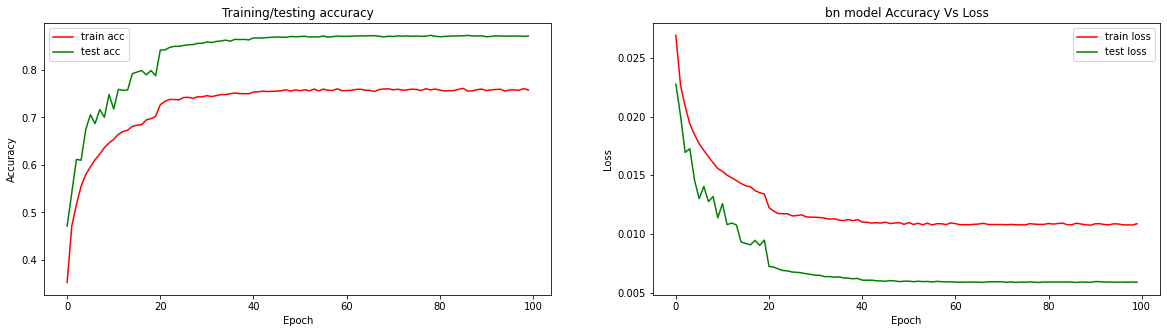

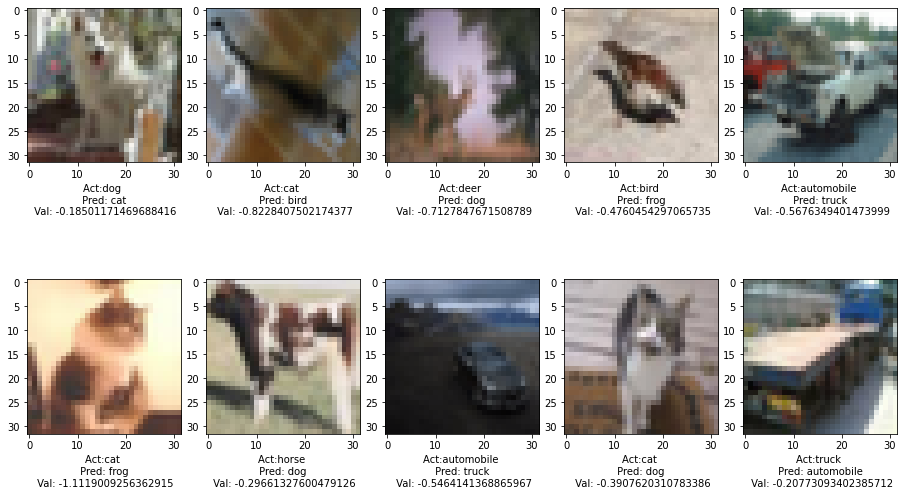

In [ ]:
if __name__ == "__main__":
    batch_size = 64
    epochs = 100

    _=torch.manual_seed(1)
    if torch.cuda.is_available():
        _=torch.cuda.manual_seed(1)

    train,test = get_data()
    #take input as normal_type ['gbn','bn','gn','ln']
    # To Un Normalize the test data
    mean,std  = get_data_stats(test,train,img_norm_typ ='train+test',plot = False)
    
    # # Advanced Normalization
    train_transform =A.Compose([A.Resize(32,32),
                                A.Normalize(mean = mean,std = std,max_pixel_value=255,always_apply = True),
                                 A.ShiftScaleRotate(always_apply=False),
                                 A.CoarseDropout(always_apply = False,max_holes = 1, max_height=16, max_width=16, min_holes = 1, min_height=16, min_width=16, fill_value=mean, mask_fill_value = None),
                                ToTensorV2(transpose_mask =False),
                                 ])      
    test_transform = A.Compose([A.Resize(32,32),
                                 A.Normalize(mean = mean,std = std,max_pixel_value=255,always_apply = True),
                               ToTensorV2(transpose_mask =False), ])
                               
    train_alb = AlbumDataset(train,train_transform)
    test_alb = AlbumDataset(test,test_transform)

    args = {'pin_memory':True,'num_workers':4} if torch.cuda.is_available() else {}
    train_loader = DataLoader(train_alb,batch_size=batch_size,shuffle = True,**args)
    test_loader = DataLoader(test_alb,batch_size=batch_size,**args)
    # ['gbn','bn','gn','ln']
    try_type = ['bn']
    for norm_type in try_type:

        model_class = Cifar10Net1(dropout_val=0.00,norm_type=norm_type)
        model,train_losses, train_accuracy,test_losses,test_accuracy = Run_Model(model_class,train_loader,test_loader,epochs =epochs)

        plot_acc_loss(norm_type ,train_accuracy,train_losses,test_accuracy,test_losses)
        clean_gpu()

        print_wrong_image(model,test_loader,mean,std,2,5)
        clean_gpu()